# Phase 3 Capstone project

In [1]:
import sqlite3
import pandas as pd
import csv

**3.1 Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table.**

In [2]:
crime_agaist_women = "CREATE TABLE crime_agaist_women (state_ut TEXT,district TEXT,year INTEGER,rape INTEGER,kidnapping_and_abduction INTEGER,dowry_deaths INTEGER,assault_on_women_with_intent_to_outrage_her_modesty INTEGER,insult_to_modesty_of_women INTEGER,cruelty_by_husband_or_his_relatives INTEGER,importation_of_girls INTEGER)"

In [3]:
db = sqlite3.connect('CRIMEDB.db')

cur = db.cursor()

In [4]:
with open("42_District_wise_crimes_committed_against_women_2001_2012.csv","r")as file:
    total_records=0
    for row in file:
        cur.execute("insert into crimes (state_ut,district,year,rape,kidnapping_and_abduction,dowry_deaths,assault_on_women_with_intent_to_outrage_her_modesty,insult_to_modesty_of_women,cruelty_by_husband_or_his_relatives,importation_of_girls) values (?,?,?,?,?,?,?,?,?,?)",row.split(","))
        db.commit()
        total_records+=1
    print("records inserted",total_records)

records inserted 9017


In [5]:
rows=cur.execute("select * from crimes")

In [6]:
for i in rows:
    print(i)

('"ANDHRA PRADESH"', '"ADILABAD"', 2001, 50, 30, 16, 149, 34, 175, 0)
('"ANDHRA PRADESH"', '"ADILABAD"', 2001, 50, 30, 16, 149, 34, 175, 0)
('"ANDHRA PRADESH"', '"ANANTAPUR"', 2001, 23, 30, 7, 118, 24, 154, 0)
('"ANDHRA PRADESH"', '"CHITTOOR"', 2001, 27, 34, 14, 112, 83, 186, 0)
('"ANDHRA PRADESH"', '"CUDDAPAH"', 2001, 20, 20, 17, 126, 38, 57, 0)
('"ANDHRA PRADESH"', '"EAST GODAVARI"', 2001, 23, 26, 12, 109, 58, 247, 0)
('"ANDHRA PRADESH"', '"GUNTAKAL RLY."', 2001, 0, 0, 0, 1, 0, 0, 0)
('"ANDHRA PRADESH"', '"GUNTUR"', 2001, 54, 51, 7, 139, 129, 378, 0)
('"ANDHRA PRADESH"', '"HYDERABAD CITY"', 2001, 37, 39, 24, 118, 27, 746, 0)
('"ANDHRA PRADESH"', '"KARIMNAGAR"', 2001, 56, 49, 62, 414, 81, 224, 0)
('"ANDHRA PRADESH"', '"KHAMMAM"', 2001, 47, 30, 17, 180, 336, 172, 0)
('"ANDHRA PRADESH"', '"KRISHNA"', 2001, 37, 21, 10, 208, 72, 265, 0)
('"ANDHRA PRADESH"', '"KURNOOL"', 2001, 29, 47, 13, 141, 107, 92, 0)
('"ANDHRA PRADESH"', '"MAHABOOBNAGAR"', 2001, 59, 27, 14, 176, 41, 69, 0)
('"ANDHRA P

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



('"TAMIL NADU"', '"TRICHY RURAL"', 2012, 14, 23, 3, 33, 0, 24, 0)
('"TAMIL NADU"', '"TRICHY URBAN"', 2012, 7, 13, 3, 9, 39, 24, 0)
('"TAMIL NADU"', '"VELLORE"', 2012, 24, 68, 8, 38, 0, 61, 0)
('"TAMIL NADU"', '"VILLUPURAM"', 2012, 78, 188, 4, 239, 0, 58, 0)
('"TAMIL NADU"', '"VIRUDHUNAGAR"', 2012, 23, 32, 2, 23, 110, 47, 0)
('"TAMIL NADU"', '"TOTAL"', 2012, 737, 1693, 110, 1494, 382, 1965, 0)
('"TRIPURA"', '"DHALAI"', 2012, 35, 8, 5, 30, 0, 56, 0)
('"TRIPURA"', '"GOMATI"', 2012, 26, 14, 4, 34, 0, 157, 0)
('"TRIPURA"', '"GRP"', 2012, 0, 0, 0, 0, 0, 0, 0)
('"TRIPURA"', '"KHOWAI"', 2012, 10, 3, 3, 22, 0, 36, 0)
('"TRIPURA"', '"NORTH"', 2012, 29, 10, 3, 48, 2, 101, 0)
('"TRIPURA"', '"SIPAHIJALA"', 2012, 23, 24, 3, 42, 1, 155, 0)
('"TRIPURA"', '"SOUTH"', 2012, 30, 16, 5, 46, 0, 89, 0)
('"TRIPURA"', '"UNAKOTI"', 2012, 26, 9, 2, 26, 2, 92, 0)
('"TRIPURA"', '"WEST"', 2012, 50, 30, 12, 66, 2, 172, 0)
('"TRIPURA"', '"TOTAL"', 2012, 229, 114, 37, 314, 7, 858, 0)
('"UTTAR PRADESH"', '"AGRA"', 2012

**3.2 Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year.**

In [7]:
query='''SELECT state_ut, district, year, MAX(rape) AS highest_rapes, MAX(kidnapping_and_abduction) AS highest_kidnappings
FROM crimes
WHERE district NOT IN ('"TOTAL"', '"DELHI UT TOTAL"')
GROUP BY state_ut, district, year
ORDER BY highest_rapes DESC, highest_kidnappings DESC
LIMIT 1;'''

In [8]:
cur.execute(query)
result=cur.fetchone()

In [9]:
result

('"WEST BENGAL"', '"MURSHIDABAD"', 2009, 568, 342)

**3.3 Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year.**

In [10]:
query='''SELECT state_ut, district, year, MAX(rape) AS highest_rapes, MAX(kidnapping_and_abduction) AS highest_kidnappings
FROM crimes
WHERE district NOT IN ('"TOTAL"', '"DELHI UT TOTAL"')
GROUP BY state_ut, district, year
ORDER BY highest_rapes ASC, highest_kidnappings ASC
LIMIT 1;'''

In [11]:
cur.execute(query)
result=cur.fetchone()

In [12]:
result

('"A & N ISLANDS"', '"NICOBAR"', 2001, 0, 0)

**3.4 Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table**

In [13]:
crime_agaist_ST = "CREATE TABLE crime_agaist_ST (state_ut TEXT,district TEXT,year INTEGER,murder INTEGER,rape INTEGER,dowry_deaths INTEGER,Dacoity INTEGER,Robbery INTEGER,Arson INTEGER,hurt INTEGER,Protection_of_Civil_Rights_Act INTEGER,Prevention_of_atrocities_Act INTEGER,Other_crimes INTEGER)"

In [14]:
cur.execute(crime_agaist_ST)

In [15]:
with open("02_District_wise_crimes_committed_against_ST_2001_2012.csv","r")as file:
    total_records=0
    for row in file:
        cur.execute("insert into crime_agaist_ST (state_ut,district,year,murder,rape,dowry_deaths,Dacoity,Robbery,Arson,hurt,Protection_of_Civil_Rights_Act,Prevention_of_atrocities_Act,Other_crimes) values (?,?,?,?,?,?,?,?,?,?,?,?,?)",row.split(","))
        db.commit()
        total_records+=1
    print("records inserted",total_records)

records inserted 9019


In [16]:
rows=cur.execute("select * from crime_agaist_ST")
for i in rows:
    print(i)

('"STATE/UT"', '"DISTRICT"', '"Year"', '"Murder"', '"Rape"', '"Kidnapping Abduction"', '"Dacoity"', '"Robbery"', '"Arson"', '"Hurt"', '"Protection of Civil Rights (PCR) Act"', '"Prevention of atrocities (POA) Act"', '"Other Crimes Against STs"\n')
('"ANDHRA PRADESH"', '"ADILABAD"', 2001, 0, 1, 2, 0, 0, 0, 2, 0, 0, 13)
('"ANDHRA PRADESH"', '"ANANTAPUR"', 2001, 0, 0, 0, 0, 0, 0, 7, 0, 1, 6)
('"ANDHRA PRADESH"', '"CHITTOOR"', 2001, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0)
('"ANDHRA PRADESH"', '"CUDDAPAH"', 2001, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0)
('"ANDHRA PRADESH"', '"EAST GODAVARI"', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14)
('"ANDHRA PRADESH"', '"GUNTAKAL RLY."', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('"ANDHRA PRADESH"', '"GUNTUR"', 2001, 0, 2, 1, 0, 0, 0, 10, 0, 3, 19)
('"ANDHRA PRADESH"', '"HYDERABAD CITY"', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2)
('"ANDHRA PRADESH"', '"KARIMNAGAR"', 2001, 0, 0, 0, 0, 0, 0, 15, 0, 0, 2)
('"ANDHRA PRADESH"', '"KHAMMAM"', 2001, 1, 4, 0, 0, 0, 0, 8, 0, 9, 20)
('"ANDHRA PRADESH"',

**3.5 Write SQL query to find the highest number of dacoity/robbery in which district.**

In [17]:
query='''SELECT district, 
       CASE 
           WHEN MAX(Dacoity) >= MAX(Robbery) THEN MAX(Dacoity) 
           ELSE MAX(Robbery) 
       END AS highest_incidents 
FROM crime_agaist_ST
WHERE district NOT IN ('"TOTAL"', '"DELHI UT TOTAL"')
GROUP BY district 
ORDER BY highest_incidents DESC 
LIMIT 1;'''

In [18]:
cur.execute(query)
result=cur.fetchone()

In [19]:
print(result)

('"DISTRICT"', '"Robbery"')


**3.6 Write SQL query to find in which districts(All) the lowest number of murders happened.**

In [20]:
query='''SELECT district, MIN(murder) AS lowest_murders
FROM crime_agaist_ST
GROUP BY district
ORDER BY lowest_murders ASC;'''

In [21]:
cur.execute(query)
result=cur.fetchone()

In [22]:
print(result)

('"24 PARGANAS NORTH"', 0)


**3.7 Write SQL query to find the number of murders in ascending order in district and year wise.**

In [23]:
query='''SELECT district, year, murder
FROM crime_agaist_ST
ORDER BY district ASC, year ASC, murder ASC;'''

In [24]:
df = pd.read_sql_query(query, db)

# Display the DataFrame (query results) as a table
print(df)

                 district  year murder
0     "24 PARGANAS NORTH"  2001      0
1     "24 PARGANAS NORTH"  2002      0
2     "24 PARGANAS NORTH"  2003      0
3     "24 PARGANAS NORTH"  2004      0
4     "24 PARGANAS NORTH"  2005      0
...                   ...   ...    ...
9014          "ZUNHEBOTO"  2008      0
9015          "ZUNHEBOTO"  2009      0
9016          "ZUNHEBOTO"  2010      0
9017          "ZUNHEBOTO"  2011      0
9018          "ZUNHEBOTO"  2012      0

[9019 rows x 3 columns]


**3.8.1 Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table.**

In [25]:
crime_IPC = "CREATE TABLE crimes_ipc (state_ut TEXT,district TEXT,year INTEGER,murder INTEGER,attepmt_murder TEXT,rape INTEGER)"

In [26]:
cur.execute(crime_IPC)

In [27]:
with open("crimes_data_part.csv","r")as file:
    total_records=0
    for row in file:
        cur.execute("insert into crimes_ipc (state_ut,district,year,murder,attepmt_murder,rape) values (?,?,?,?,?,?)",row.split(","))
        db.commit()
        total_records+=1
    print("records inserted",total_records)

records inserted 9017


In [28]:
rows=cur.execute("select * from crimes_ipc")
for i in rows:
    print(i)

('ANDHRA PRADESH', 'ADILABAD', 2001, 101, '60', 50)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 151, '125', 23)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 101, '57', 27)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 80, '53', 20)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 82, '67', 23)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 3, '1', 0)
('ANDHRA PRADESH', 'GUNTUR', 2001, 182, '88', 54)
('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 111, '113', 37)
('ANDHRA PRADESH', 'KARIMNAGAR', 2001, 162, '85', 56)
('ANDHRA PRADESH', 'KHAMMAM', 2001, 93, '60', 47)
('ANDHRA PRADESH', 'KRISHNA', 2001, 65, '51', 37)
('ANDHRA PRADESH', 'KURNOOL', 2001, 133, '72', 29)
('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2001, 157, '67', 59)
('ANDHRA PRADESH', 'MEDAK', 2001, 101, '56', 35)
('ANDHRA PRADESH', 'NALGONDA', 2001, 122, '60', 35)
('ANDHRA PRADESH', 'NELLORE', 2001, 89, '69', 46)
('ANDHRA PRADESH', 'NIZAMABAD', 2001, 106, '49', 21)
('ANDHRA PRADESH', 'PRAKASHAM', 2001, 102, '82', 19)
('ANDHRA PRADESH', 'RANGA REDDY', 2001, 214, '95', 72)

**3.8.2 Write SQL query to find which District in each state/UT has the highest number of murders year wise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.**

In [29]:
query='''WITH RankedMurders AS (
    SELECT
        state_ut,
        year,
        district,
        murder,
        ROW_NUMBER() OVER (PARTITION BY state_ut, YEAR ORDER BY murder DESC) AS rn
    FROM
        crimes_ipc
    WHERE
        DISTRICT NOT IN ('TOTAL', 'DELHI UT TOTAL')
)

SELECT
    state_ut,
    year,
    district,
    murder
FROM
    RankedMurders
WHERE
    rn = 1;'''

In [30]:
row=cur.execute(query)
result=cur.fetchall()
print(result)

[('A & N ISLANDS', 2001, 'ANDAMAN', 13), ('A & N ISLANDS', 2002, 'ANDAMAN', 14), ('A & N ISLANDS', 2003, 'ANDAMAN', 16), ('A & N ISLANDS', 2004, 'ANDAMAN', 13), ('A & N ISLANDS', 2005, 'ANDAMAN', 14), ('A & N ISLANDS', 2006, 'ANDAMAN', 3), ('A & N ISLANDS', 2007, 'A and N ISLANDS', 15), ('A & N ISLANDS', 2008, 'ANDAMAN', 8), ('A & N ISLANDS', 2009, 'ANDAMAN', 15), ('A & N ISLANDS', 2010, 'ANDAMAN', 8), ('A & N ISLANDS', 2011, 'ANDAMAN', 14), ('A & N ISLANDS', 2012, 'SOUTH', 8), ('ANDHRA PRADESH', 2001, 'RANGA REDDY', 214), ('ANDHRA PRADESH', 2002, 'RANGA REDDY', 214), ('ANDHRA PRADESH', 2003, 'GUNTUR', 210), ('ANDHRA PRADESH', 2004, 'MAHABOOBNAGAR', 183), ('ANDHRA PRADESH', 2005, 'MAHABOOBNAGAR', 212), ('ANDHRA PRADESH', 2006, 'CYBERABAD', 193), ('ANDHRA PRADESH', 2007, 'CYBERABAD', 186), ('ANDHRA PRADESH', 2008, 'CYBERABAD', 197), ('ANDHRA PRADESH', 2009, 'CYBERABAD', 186), ('ANDHRA PRADESH', 2010, 'CYBERABAD', 187), ('ANDHRA PRADESH', 2011, 'CYBERABAD', 213), ('ANDHRA PRADESH', 2012,

**3.8.3 Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/UT, district, murders, and year in descending order.**

In [31]:
df = pd.read_sql_query(query, db)

In [32]:
df

state_ut  year           district  murder
0    A & N ISLANDS  2001            ANDAMAN      13
1    A & N ISLANDS  2002            ANDAMAN      14
2    A & N ISLANDS  2003            ANDAMAN      16
3    A & N ISLANDS  2004            ANDAMAN      13
4    A & N ISLANDS  2005            ANDAMAN      14
..             ...   ...                ...     ...
415    WEST BENGAL  2008  24 PARGANAS SOUTH     239
416    WEST BENGAL  2009  24 PARGANAS NORTH     229
417    WEST BENGAL  2010   PASCHIM MIDNAPUR     268
418    WEST BENGAL  2011  24 PARGANAS SOUTH     247
419    WEST BENGAL  2012  24 PARGANAS SOUTH     224

[420 rows x 4 columns]

In [33]:
x=df["district"].value_counts()

In [34]:
import seaborn as sns
from matplotlib import pyplot as plt

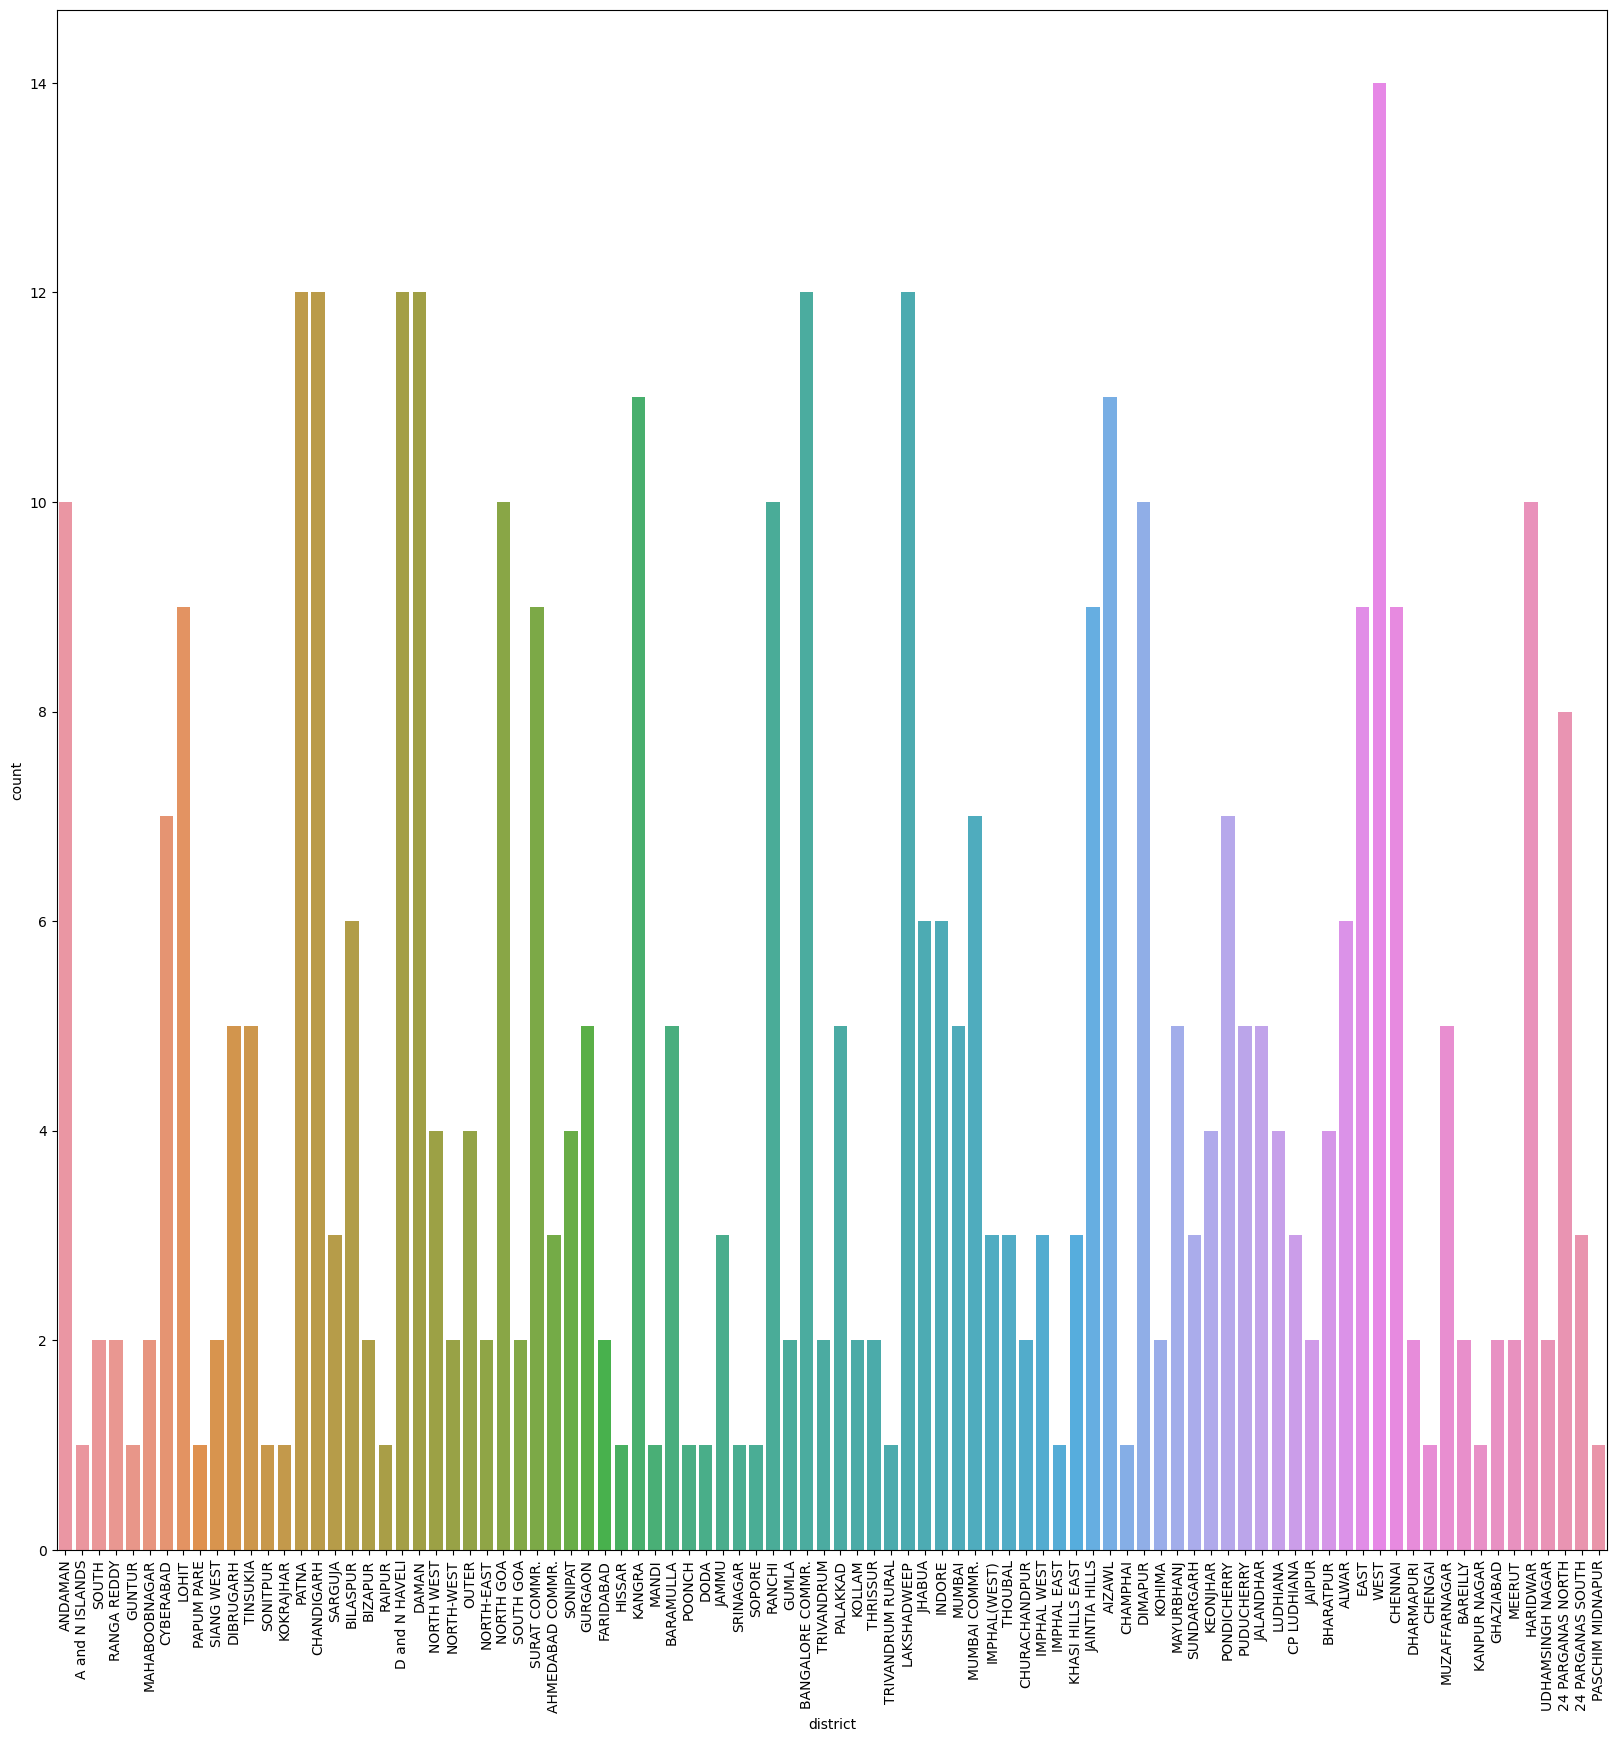

district
WEST                14
BANGALORE COMMR.    12
DAMAN               12
D and N HAVELI      12
CHANDIGARH          12
                    ..
SOPORE               1
SRINAGAR             1
DODA                 1
POONCH               1
PASCHIM MIDNAPUR     1
Name: count, Length: 92, dtype: int64


In [35]:
plt.figure(figsize=(20,20))
ax=sns.countplot(x="district",data=df)
plt.xticks(rotation=90)
plt.show()
print(df["district"].value_counts())

In [36]:
district_counts = df['district'].value_counts()
districts_to_analyze = district_counts[district_counts >= 3].index

In [37]:
districts_to_analyze

Index(['WEST', 'BANGALORE COMMR.', 'DAMAN', 'D and N HAVELI', 'CHANDIGARH',
       'PATNA', 'LAKSHADWEEP', 'AIZAWL', 'KANGRA', 'ANDAMAN', 'DIMAPUR',
       'NORTH GOA', 'RANCHI', 'HARIDWAR', 'EAST', 'LOHIT', 'CHENNAI',
       'JAINTIA HILLS', 'SURAT COMMR.', '24 PARGANAS NORTH', 'CYBERABAD',
       'MUMBAI COMMR.', 'PONDICHERRY', 'ALWAR', 'JHABUA', 'BILASPUR', 'INDORE',
       'MAYURBHANJ', 'MUMBAI', 'PUDUCHERRY', 'JALANDHAR', 'MUZAFFARNAGAR',
       'BARAMULLA', 'PALAKKAD', 'DIBRUGARH', 'GURGAON', 'TINSUKIA',
       'NORTH WEST', 'BHARATPUR', 'OUTER', 'LUDHIANA', 'SONIPAT', 'KEONJHAR',
       'THOUBAL', 'SUNDARGARH', 'IMPHAL(WEST)', 'AHMEDABAD COMMR.', 'SARGUJA',
       'KHASI HILLS EAST', 'IMPHAL WEST', 'CP LUDHIANA', 'JAMMU',
       '24 PARGANAS SOUTH'],
      dtype='object', name='district')

In [38]:
filtered_df = df[df['district'].isin(districts_to_analyze)]

In [39]:
filtered_df

state_ut  year           district  murder
0    A & N ISLANDS  2001            ANDAMAN      13
1    A & N ISLANDS  2002            ANDAMAN      14
2    A & N ISLANDS  2003            ANDAMAN      16
3    A & N ISLANDS  2004            ANDAMAN      13
4    A & N ISLANDS  2005            ANDAMAN      14
..             ...   ...                ...     ...
414    WEST BENGAL  2007  24 PARGANAS NORTH     194
415    WEST BENGAL  2008  24 PARGANAS SOUTH     239
416    WEST BENGAL  2009  24 PARGANAS NORTH     229
418    WEST BENGAL  2011  24 PARGANAS SOUTH     247
419    WEST BENGAL  2012  24 PARGANAS SOUTH     224

[360 rows x 4 columns]

In [40]:
plt.figure(figsize=(20,20))
ax=sns.countplot(x="district",data=filtered_df)
plt.xticks(rotation=90)
plt.show()
print(df["district"].value_counts())

district
WEST                14
BANGALORE COMMR.    12
DAMAN               12
D and N HAVELI      12
CHANDIGARH          12
                    ..
SOPORE               1
SRINAGAR             1
DODA                 1
POONCH               1
PASCHIM MIDNAPUR     1
Name: count, Length: 92, dtype: int64


In [41]:
district_year_counts = filtered_df.groupby('district')['year'].nunique()

In [42]:
district_year_counts

district
24 PARGANAS NORTH     8
24 PARGANAS SOUTH     3
AHMEDABAD COMMR.      3
AIZAWL               11
ALWAR                 6
ANDAMAN              10
BANGALORE COMMR.     12
BARAMULLA             5
BHARATPUR             4
BILASPUR              6
CHANDIGARH           12
CHENNAI               9
CP LUDHIANA           3
CYBERABAD             7
D and N HAVELI       12
DAMAN                12
DIBRUGARH             5
DIMAPUR              10
EAST                  9
GURGAON               5
HARIDWAR             10
IMPHAL WEST           3
IMPHAL(WEST)          3
INDORE                6
JAINTIA HILLS         9
JALANDHAR             5
JAMMU                 3
JHABUA                6
KANGRA               11
KEONJHAR              4
KHASI HILLS EAST      3
LAKSHADWEEP          12
LOHIT                 9
LUDHIANA              4
MAYURBHANJ            5
MUMBAI                5
MUMBAI COMMR.         7
MUZAFFARNAGAR         5
NORTH GOA            10
NORTH WEST            4
OUTER                 4
PALAKKA

In [43]:
districts_to_analyze = district_year_counts[district_year_counts >= 3].index

In [44]:
final_df = filtered_df[filtered_df['district'].isin(districts_to_analyze)]
final_df

state_ut  year           district  murder
0    A & N ISLANDS  2001            ANDAMAN      13
1    A & N ISLANDS  2002            ANDAMAN      14
2    A & N ISLANDS  2003            ANDAMAN      16
3    A & N ISLANDS  2004            ANDAMAN      13
4    A & N ISLANDS  2005            ANDAMAN      14
..             ...   ...                ...     ...
414    WEST BENGAL  2007  24 PARGANAS NORTH     194
415    WEST BENGAL  2008  24 PARGANAS SOUTH     239
416    WEST BENGAL  2009  24 PARGANAS NORTH     229
418    WEST BENGAL  2011  24 PARGANAS SOUTH     247
419    WEST BENGAL  2012  24 PARGANAS SOUTH     224

[360 rows x 4 columns]

In [45]:
final_df_sorted = final_df.sort_values(by=['state_ut', 'district', 'murder', 'year'], ascending=[True, True, False, False])


print(final_df_sorted)

          state_ut  year           district  murder
2    A & N ISLANDS  2003            ANDAMAN      16
8    A & N ISLANDS  2009            ANDAMAN      15
10   A & N ISLANDS  2011            ANDAMAN      14
4    A & N ISLANDS  2005            ANDAMAN      14
1    A & N ISLANDS  2002            ANDAMAN      14
..             ...   ...                ...     ...
412    WEST BENGAL  2005  24 PARGANAS NORTH     168
413    WEST BENGAL  2006  24 PARGANAS NORTH     154
418    WEST BENGAL  2011  24 PARGANAS SOUTH     247
415    WEST BENGAL  2008  24 PARGANAS SOUTH     239
419    WEST BENGAL  2012  24 PARGANAS SOUTH     224

[360 rows x 4 columns]


**3.8.4 Use appropriate graphs to show your data (the result of 3.8.3).**

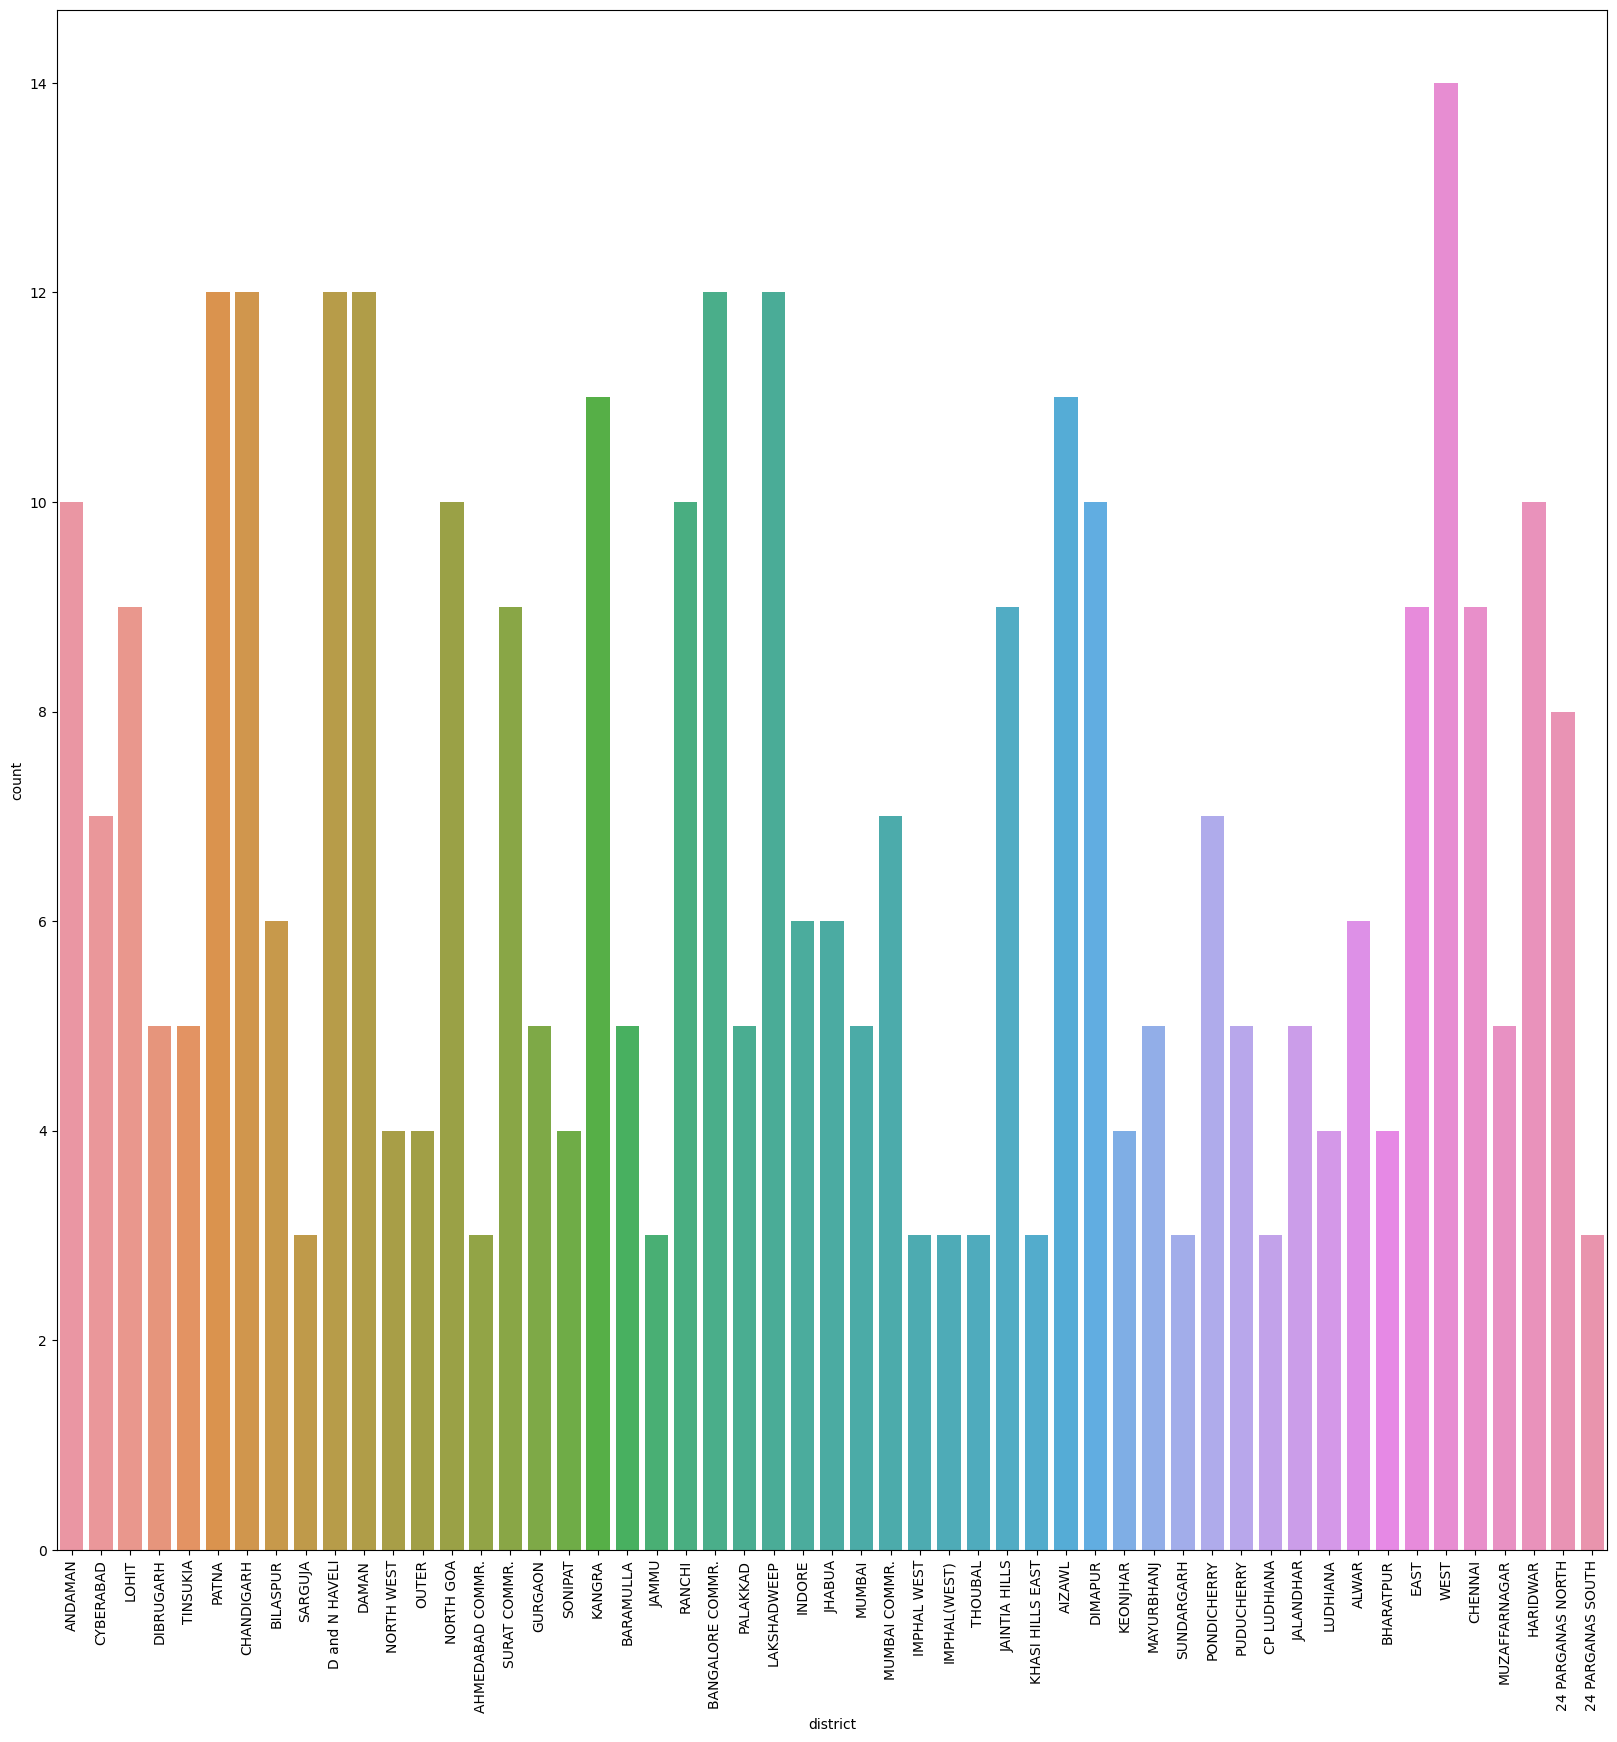

district
WEST                14
BANGALORE COMMR.    12
DAMAN               12
D and N HAVELI      12
CHANDIGARH          12
                    ..
SOPORE               1
SRINAGAR             1
DODA                 1
POONCH               1
PASCHIM MIDNAPUR     1
Name: count, Length: 92, dtype: int64


In [46]:
plt.figure(figsize=(20,20))
ax=sns.countplot(x="district",data=final_df_sorted)
plt.xticks(rotation=90)
plt.show()
print(df["district"].value_counts())


With the above graph you can see only the cities that are repeated more than 3 

**So the above graph shows the results that are asked in 3.8.3**